In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [71]:
import warnings 
warnings.filterwarnings("ignore")

In [138]:
Slpd = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
Slpd.sample(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
292,293,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
45,46,Male,31,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
252,253,Female,45,Teacher,6.5,7,45,4,Overweight,135/90,65,6000,Insomnia
333,334,Female,54,Engineer,8.4,9,30,3,Normal,125/80,65,5000,NaN
247,248,Male,44,Engineer,6.8,7,45,7,Overweight,130/85,78,5000,Insomnia
361,362,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
148,149,Female,39,Lawyer,6.9,7,50,6,Normal Weight,128/85,75,5500,NaN
335,336,Female,54,Engineer,8.4,9,30,3,Normal,125/80,65,5000,NaN
67,68,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,Insomnia
68,69,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,NaN


In [139]:
Slpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# Data Analysis

In [140]:
# Dealing with the categorical columns one at a time.
# Gender
Slpd['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [141]:
Slpd.shape

(374, 13)

In [142]:
Slpd['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [143]:
Slpd['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [144]:
Slpd.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [145]:
Slpd.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Text(0, 0.5, 'Age')

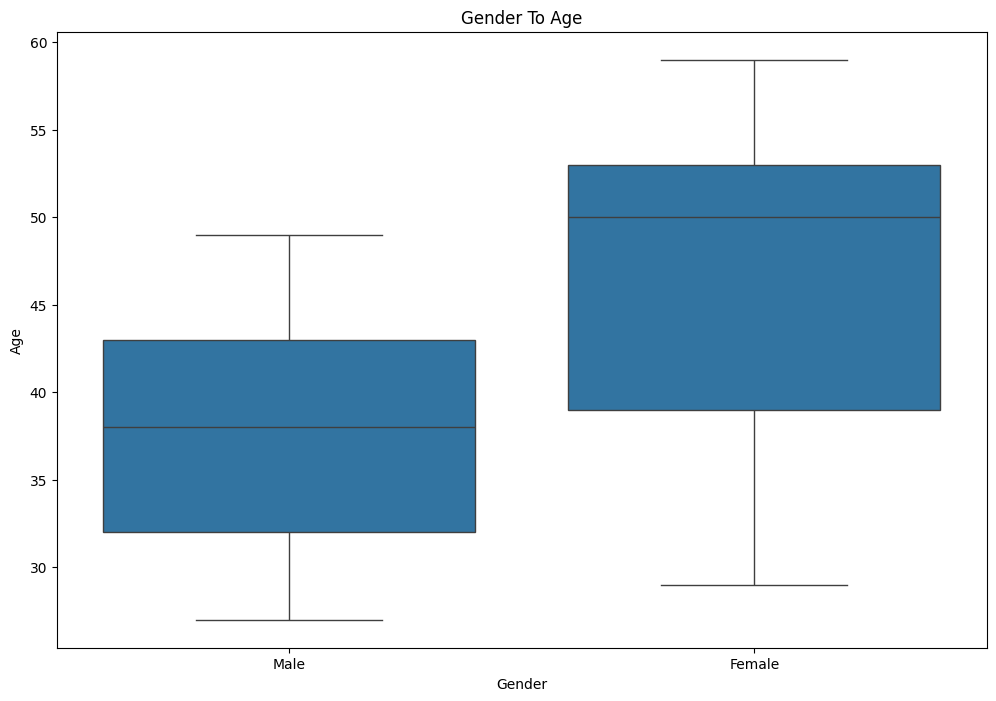

In [146]:
plt.figure(figsize = (12,8))
plt.title("Gender To Age")
sns.boxplot(x = Slpd['Gender'], y = Slpd['Age'])
plt.xlabel("Gender")
plt.ylabel("Age")

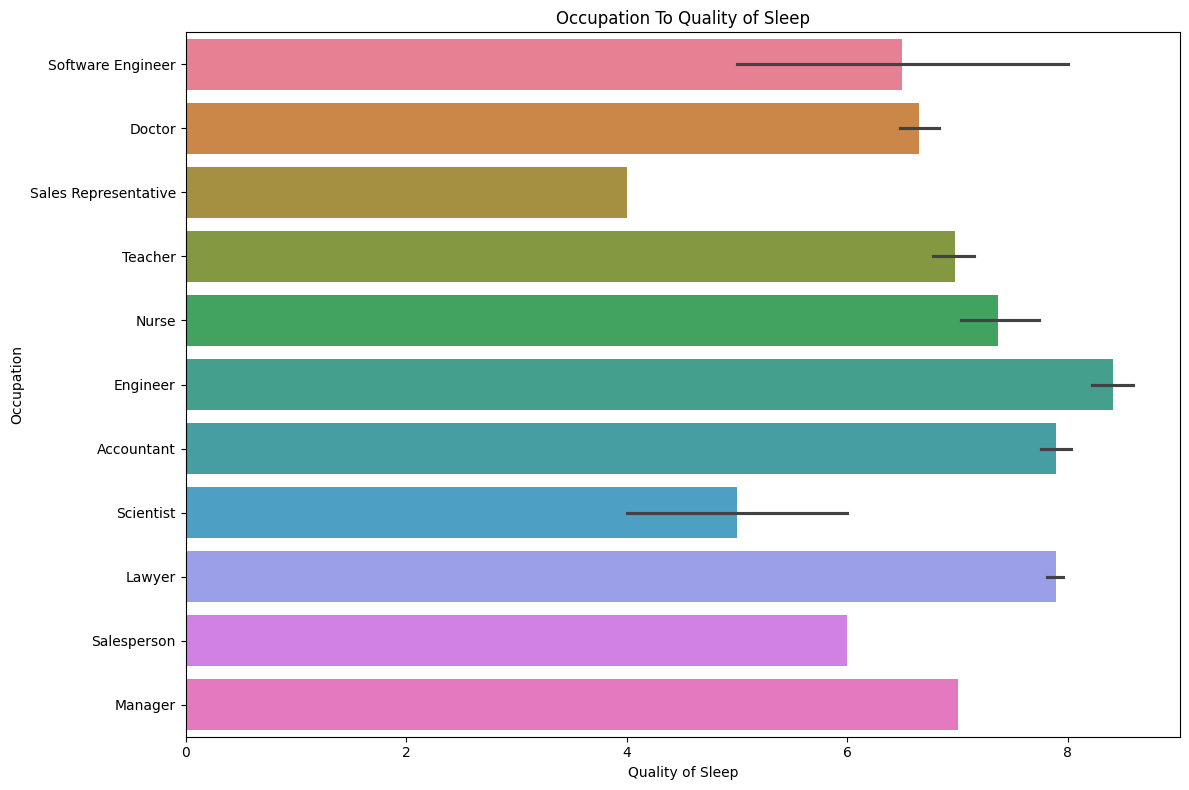

In [147]:
# Setting a color palette for the bars
colors = sns.color_palette("husl", len(Slpd['Occupation'].unique()))

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
plt.title("Occupation To Quality of Sleep")
sns.barplot(
    y=Slpd['Occupation'], 
    x=Slpd['Quality of Sleep'], 
    palette=colors  # Apply the color palette
)
plt.xlabel("Quality of Sleep")
plt.ylabel("Occupation")
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [148]:
managers = Slpd[Slpd['Occupation'] == 'Manager']
display(managers)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
263,264,Female,45,Manager,6.9,7,55,5,Overweight,125/82,75,5500,NaN


In [149]:
Slpd.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

Text(0.5, 1.0, 'Gender and Sleep Disorder')

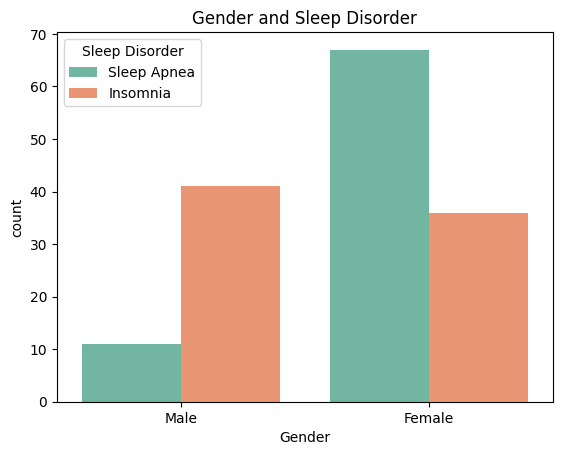

In [152]:
#Gender count plot
sns.countplot(x = 'Gender', data = Slpd, palette = 'Set2', hue = 'Sleep Disorder').set_title('Gender and Sleep Disorder')

<Axes: xlabel='Sleep Disorder', ylabel='count'>

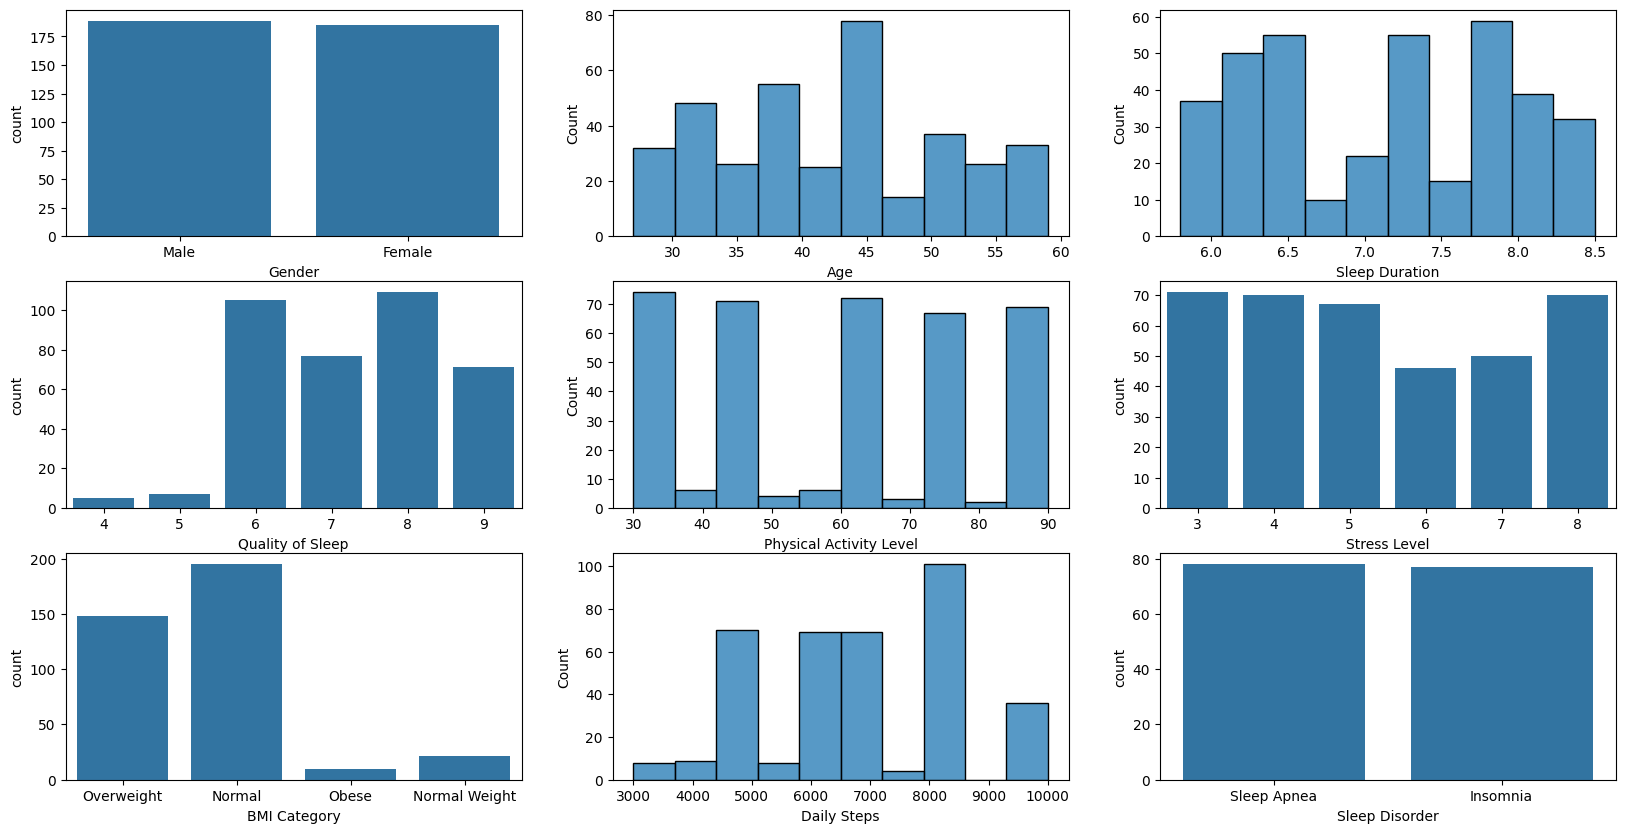

In [85]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = Slpd, ax = ax[0,0])
sns.histplot(x = 'Age', data = Slpd, ax = ax[0,1], bins = 10)
sns.histplot(x = 'Sleep Duration', data = Slpd, ax = ax[0,2], bins = 10)
sns.countplot(x = 'Quality of Sleep', data = Slpd, ax = ax[1,0])
sns.histplot(x = 'Physical Activity Level', data = Slpd, ax = ax[1,1], bins = 10)
sns.countplot(x = 'Stress Level', data = Slpd, ax = ax[1,2])
sns.countplot(x = 'BMI Category', data = Slpd, ax = ax[2,0])
sns.histplot(x = 'Daily Steps', data = Slpd, ax = ax[2,1], bins = 10)
sns.countplot(x = 'Sleep Disorder', data = Slpd, ax = ax[2,2])

[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

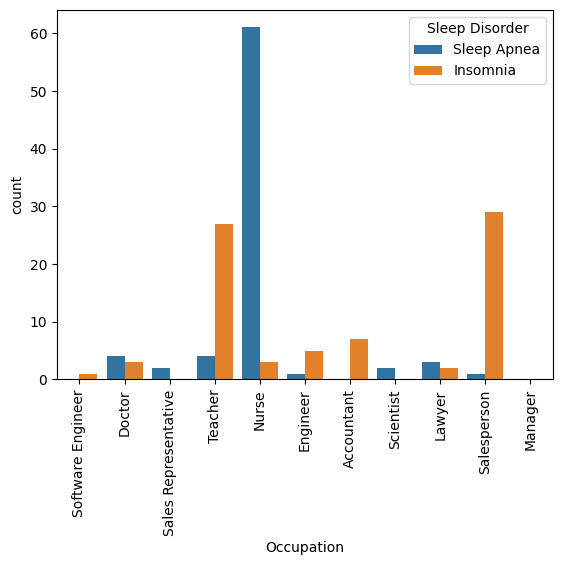

In [86]:
ax = sns.countplot(x = 'Occupation', data = Slpd, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

Gender,Female,Male
Occupation,,
Accountant,7.0,0.0
Doctor,0.0,3.5
Engineer,1.0,2.5
Lawyer,1.0,2.0
Nurse,32.0,0.0
Sales Representative,0.0,2.0
Salesperson,0.0,15.0
Scientist,2.0,0.0
Software Engineer,0.0,1.0


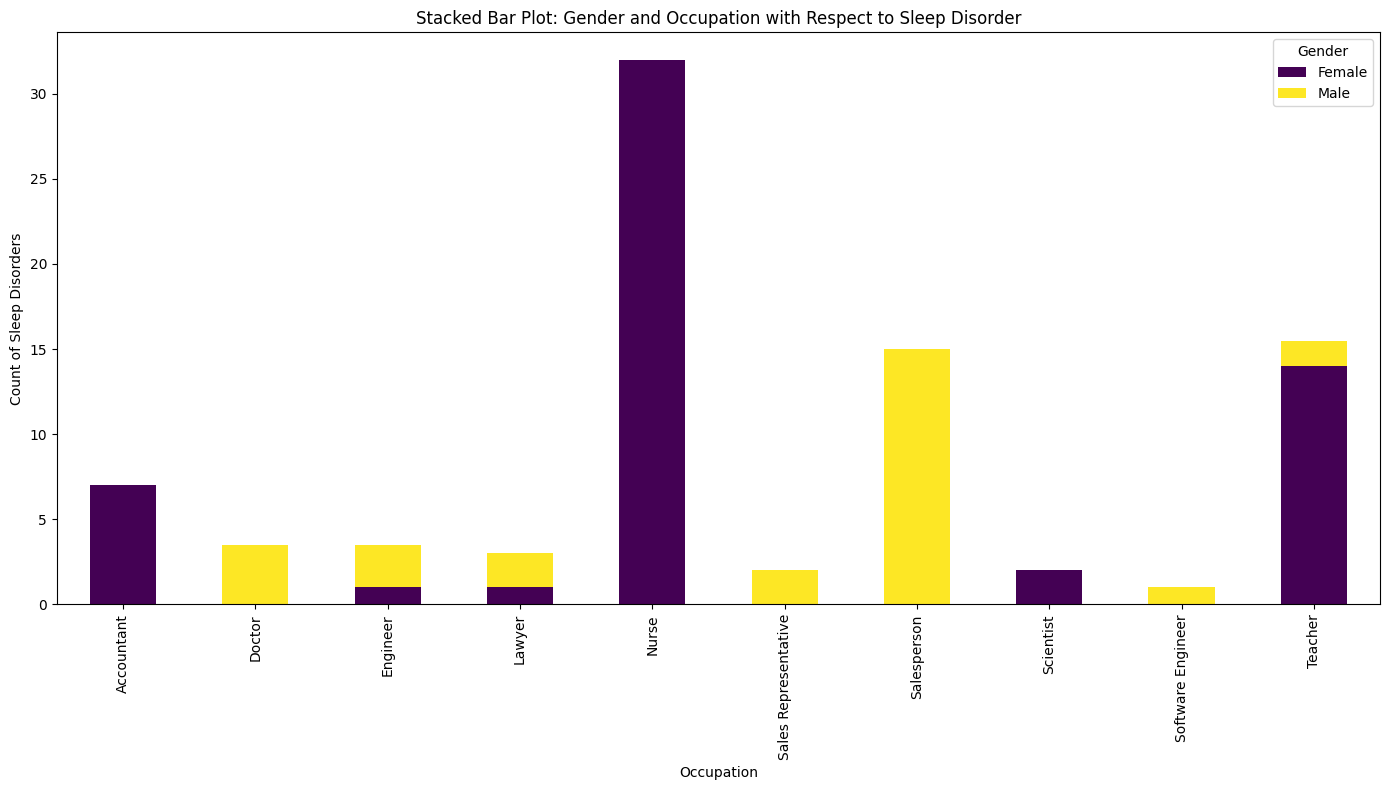

In [87]:
data_grouped = Slpd.groupby(['Gender', 'Occupation', 'Sleep Disorder']).size().reset_index(name='Count')

# Pivot the data to create a format suitable for a stacked plot
data_pivot = data_grouped.pivot_table(index='Occupation', columns='Gender', values='Count', fill_value=0)
display(data_pivot)
# Plotting
data_pivot.plot(
    kind='bar', 
    stacked=True, 
    figsize=(14, 8), 
    colormap='viridis'  # You can change the colormap to any other
)

# Customizing plot
plt.title("Stacked Bar Plot: Gender and Occupation with Respect to Sleep Disorder")
plt.xlabel("Occupation")
plt.ylabel("Count of Sleep Disorders")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [88]:
# Replacing Male with 1 and Female with 0
Slpd['GendInco'] = Slpd['Gender'].apply(lambda x : 1 if x == 'Male' else 0)
gen = Slpd.drop('Gender', axis = 1)
gen

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,GendInco
0,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,1
1,2,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1
2,3,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1
3,4,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1
4,5,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0
370,371,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0
371,372,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0
372,373,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0


In [89]:
# Next categorical column is Occupation.
gen['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [90]:
gen['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [91]:
# Transforming some of the attributes using .loc
# Scientist ==> Engineer
# Software Engineer ==> Engineer
# Manager ==> Salesperson
# Sales Representative ==> Salesperson
gen.loc[gen['Occupation'] == 'Software Engineer', 'Occupation'] = 'Engineer'
gen.loc[gen['Occupation'] == 'Scientist', 'Occupation'] = 'Engineer'
gen.loc[gen['Occupation'] == 'Manager', 'Occupation'] = 'Salesperson'
gen.loc[gen['Occupation'] == 'Sales Representative', 'Occupation'] = 'Salesperson'
gen['Occupation'].unique()

array(['Engineer', 'Doctor', 'Salesperson', 'Teacher', 'Nurse',
       'Accountant', 'Lawyer'], dtype=object)

In [92]:
gen.head()

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,GendInco
0,1,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,1
1,2,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1
2,3,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1
3,4,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1
4,5,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1


In [93]:
print(gen.columns)  # Check if 'Occupation' is among the columns
print(gen['Occupation'].unique())  # Check the unique values in 'Occupation'


Index(['Person ID', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'GendInco'],
      dtype='object')
['Engineer' 'Doctor' 'Salesperson' 'Teacher' 'Nurse' 'Accountant' 'Lawyer']


In [94]:
# Remove any rows with invalid 'Occupation' entries
valid_occupations = ['Accountant', 'Doctor', 'Engineer', 'Lawyer', 'Nurse', 'Salesperson', 'Teacher']
gen = gen[gen['Occupation'].isin(valid_occupations)]

In [95]:
gen.drop_duplicates()

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,GendInco
0,1,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,1
1,2,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1
2,3,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1
3,4,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1
4,5,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0
370,371,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0
371,372,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0
372,373,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0


In [96]:
# To ensure that 'Occupation' is a categorical column
if 'Occupation' in gen.columns:
    # Creating dummy variables
    Dum = pd.get_dummies(gen['Occupation'], prefix='Occupation', dtype='int')
    
    # Concatenating the dummies with the original DataFrame
    merged = pd.concat([gen, Dum], axis=1)
    
    # Dropping the original 'Occupation' column
    occupat = merged.drop('Occupation', axis=1)
    
    # Display the first 20 rows
    display(occupat.head(20))
else:
    print("The 'Occupation' column does not exist in the DataFrame.")


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,GendInco,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher
0,1,27,6.1,6,42,6,Overweight,126/83,77,4200,NaN,1,0,0,1,0,0,0,0
1,2,28,6.2,6,60,8,Normal,125/80,75,10000,NaN,1,0,1,0,0,0,0,0
2,3,28,6.2,6,60,8,Normal,125/80,75,10000,NaN,1,0,1,0,0,0,0,0
3,4,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,0,0,0,0,0,1,0
4,5,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,0,0,0,0,0,1,0
5,6,28,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,1,0,0,1,0,0,0,0
6,7,29,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,1,0,0,0,0,0,0,1
7,8,29,7.8,7,75,6,Normal,120/80,70,8000,NaN,1,0,1,0,0,0,0,0
8,9,29,7.8,7,75,6,Normal,120/80,70,8000,NaN,1,0,1,0,0,0,0,0
9,10,29,7.8,7,75,6,Normal,120/80,70,8000,NaN,1,0,1,0,0,0,0,0


In [97]:
# Analyzing the categorical variable 'BMI'
occupat['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [98]:
#Replacing Normal weight as Normal then map the observations.
occupat.loc[occupat['BMI Category'] == 'Normal Weight', 'BMI Category'] = 'Normal'
mapping = {'Normal': 0, 'Overweight' : 1, 'Obese' : 2}
occupat['BMI Level'] = occupat['BMI Category'].apply(lambda x : mapping[x])
BMI = occupat.drop('BMI Category', axis=1)
BMI.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,GendInco,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Level
0,1,27,6.1,6,42,6,126/83,77,4200,NaN,1,0,0,1,0,0,0,0,1
1,2,28,6.2,6,60,8,125/80,75,10000,NaN,1,0,1,0,0,0,0,0,0
2,3,28,6.2,6,60,8,125/80,75,10000,NaN,1,0,1,0,0,0,0,0,0
3,4,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,1,0,0,0,0,0,1,0,2
4,5,28,5.9,4,30,8,140/90,85,3000,Sleep Apnea,1,0,0,0,0,0,1,0,2


In [99]:
#Categorical variable 'Sleep Disorder'
BMI['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [100]:
# Check for NaN values and replace them with None
BMI.loc[pd.isna(BMI['Sleep Disorder']), 'Sleep Disorder'] = 'None'

In [101]:
BMI['Sleep Disorder'].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [102]:
#Mapping each category of Sleep Disorder
Sld_map = {'None' : 0, 'Sleep Apnea': 1, 'Insomnia' : 2} 

BMI['Sleep Disorder Level'] = BMI['Sleep Disorder'].apply(lambda x : Sld_map[x] )
Disleep = BMI.drop('Sleep Disorder', axis=1)
Disleep.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,GendInco,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Level,Sleep Disorder Level
0,1,27,6.1,6,42,6,126/83,77,4200,1,0,0,1,0,0,0,0,1,0
1,2,28,6.2,6,60,8,125/80,75,10000,1,0,1,0,0,0,0,0,0,0
2,3,28,6.2,6,60,8,125/80,75,10000,1,0,1,0,0,0,0,0,0,0
3,4,28,5.9,4,30,8,140/90,85,3000,1,0,0,0,0,0,1,0,2,1
4,5,28,5.9,4,30,8,140/90,85,3000,1,0,0,0,0,0,1,0,2,1


In [103]:
Disleep['Stress Level'].value_counts()

Stress Level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64

In [104]:
Disleep['Quality of Sleep'].value_counts()

Quality of Sleep
8    109
6    105
7     77
9     71
5      7
4      5
Name: count, dtype: int64

In [105]:
#Drop personal ID. This column in not necessary.
Depdata = Disleep.drop('Person ID', axis=1)
Depdata.sample()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,GendInco,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Level,Sleep Disorder Level
272,49,6.1,6,90,8,140/95,75,10000,0,0,0,0,0,1,0,0,1,1


In [106]:
# For the BP let's create a separate columns for systolic and diastolic BP

Pico = Depdata.copy()
Pico['Systole'] = Depdata['Blood Pressure'].apply(lambda x : x.split('/')[0]).astype('int')
Pico['Diastole'] = Depdata['Blood Pressure'].apply(lambda x : x.split('/')[1]).astype('int')
display(Pico.head())

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,GendInco,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Level,Sleep Disorder Level,Systole,Diastole
0,27,6.1,6,42,6,126/83,77,4200,1,0,0,1,0,0,0,0,1,0,126,83
1,28,6.2,6,60,8,125/80,75,10000,1,0,1,0,0,0,0,0,0,0,125,80
2,28,6.2,6,60,8,125/80,75,10000,1,0,1,0,0,0,0,0,0,0,125,80
3,28,5.9,4,30,8,140/90,85,3000,1,0,0,0,0,0,1,0,2,1,140,90
4,28,5.9,4,30,8,140/90,85,3000,1,0,0,0,0,0,1,0,2,1,140,90


In [107]:
Slpd = Pico.drop(['Blood Pressure'], axis=1)
Slpd.sample(10)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,GendInco,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Level,Sleep Disorder Level,Systole,Diastole
361,59,8.2,9,75,3,68,7000,0,0,0,0,0,1,0,0,1,1,140,95
219,43,6.5,6,45,7,72,6000,1,0,0,0,0,0,1,0,1,1,130,85
256,45,6.6,7,45,4,65,6000,0,0,0,0,0,0,0,1,1,2,135,90
276,49,8.1,9,85,3,86,3700,1,0,1,0,0,0,0,0,2,1,139,91
250,45,6.8,7,30,6,65,6000,0,0,0,0,0,0,0,1,1,2,135,90
50,32,7.5,8,45,3,70,8000,1,0,0,1,0,0,0,0,0,0,120,80
293,50,6.0,6,90,8,75,10000,0,0,0,0,0,1,0,0,1,1,140,95
126,38,7.3,8,60,5,68,8000,1,0,0,0,1,0,0,0,0,0,130,85
320,53,8.5,9,30,3,65,5000,0,0,0,1,0,0,0,0,0,0,125,80
351,57,8.1,9,75,3,68,7000,0,0,0,0,0,1,0,0,1,1,140,95


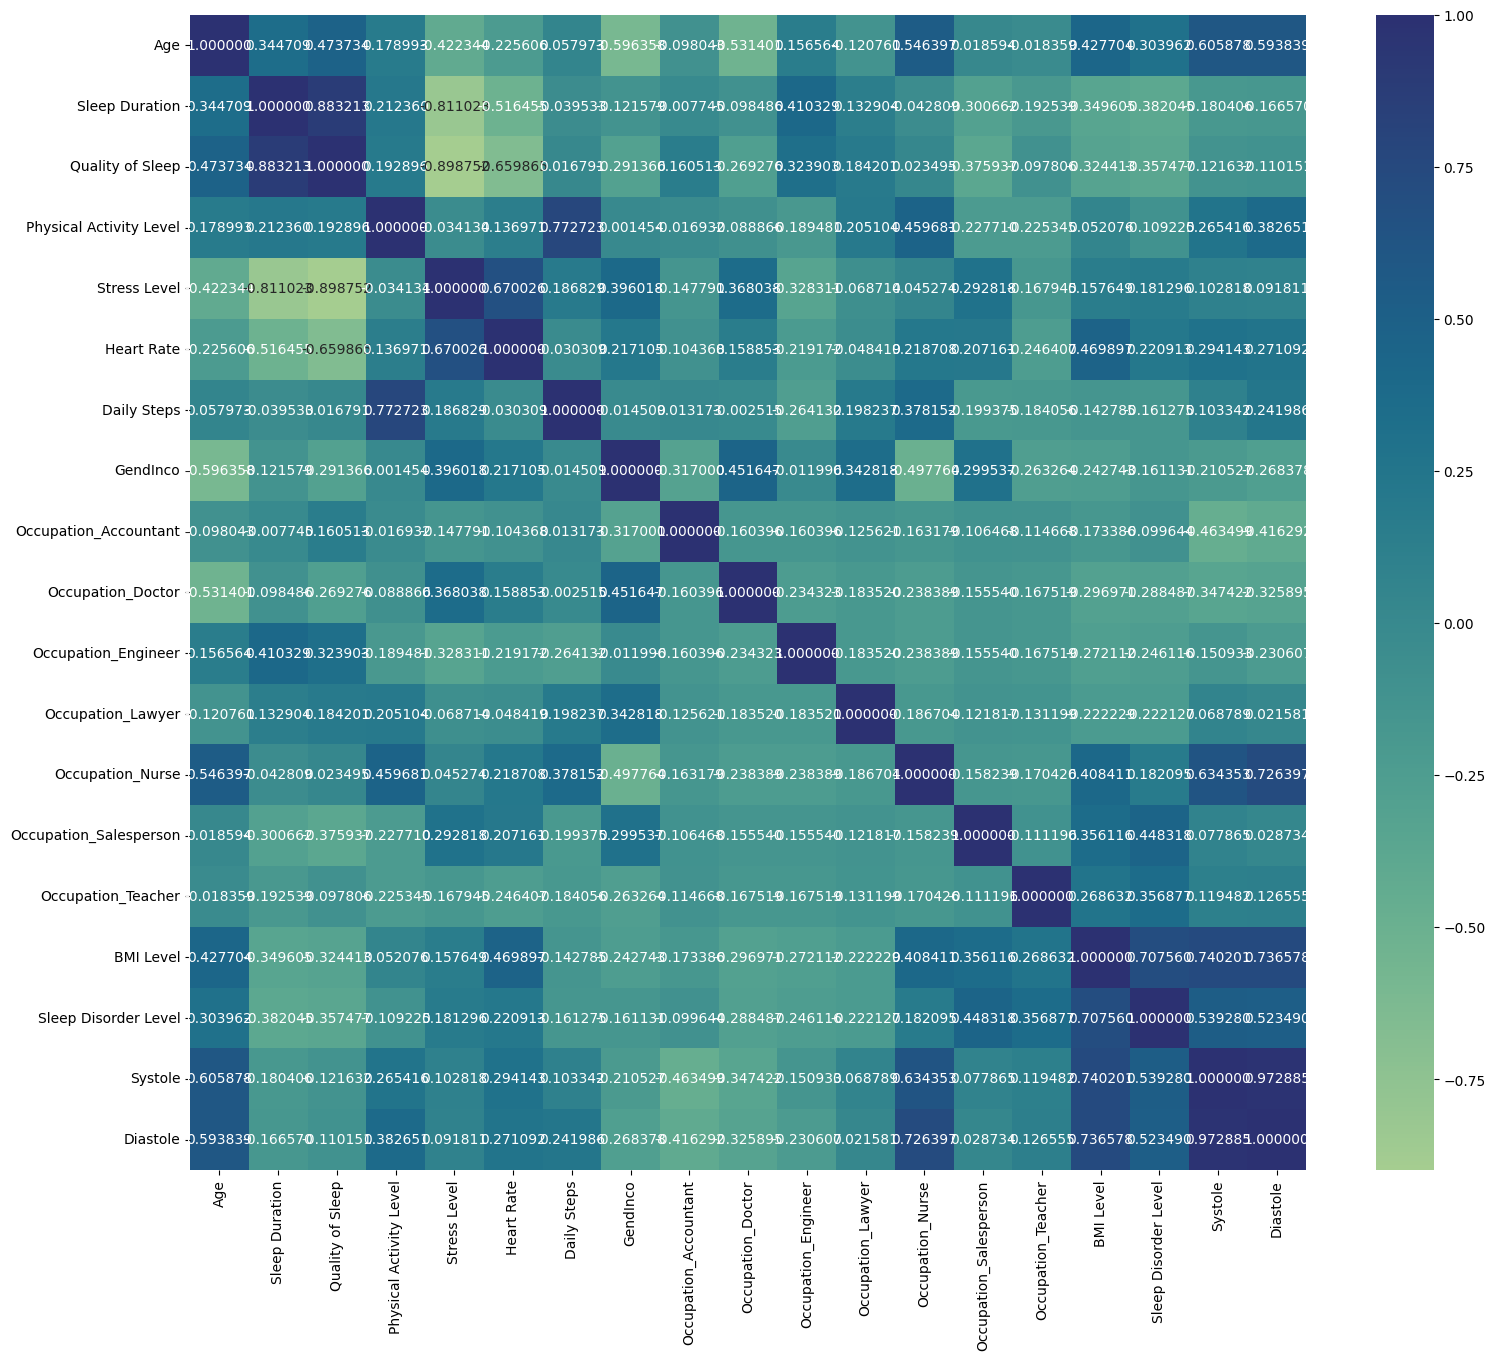

In [108]:
#Let's do a correlation of the DataFrame
plt.figure(figsize=(18, 15))
real = Slpd.corr(numeric_only=True)
sns.heatmap(real, annot=True, fmt='4f', cmap='crest')
plt.show()

#### From the Heatmap the following was observed.
##### - Daily steps and physical activity level are highly positively correlated.
##### - Quality of sleep and sleep duration are highly correlated positively.
##### - Stress level $ Heat rate are also correlated positively.
##### - Stress level $ Heat rate has high negative correlation with Quality of sleep and sleep Duration.
##### - BMI and Systole/Diastole are highly correlated. 

# 2. Data Visualisation

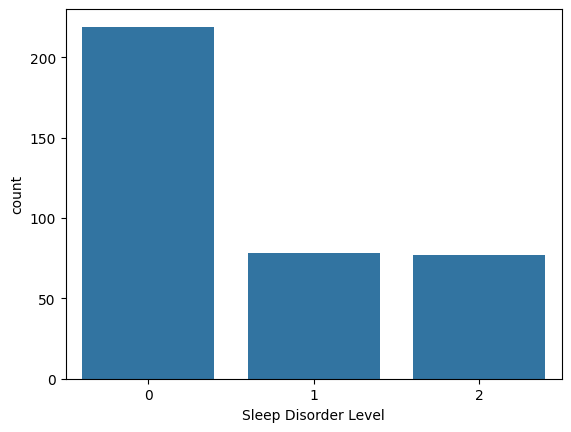

In [109]:
# Let visualize the target first. 
sns.countplot(x = 'Sleep Disorder Level', data=Slpd)
plt.show()

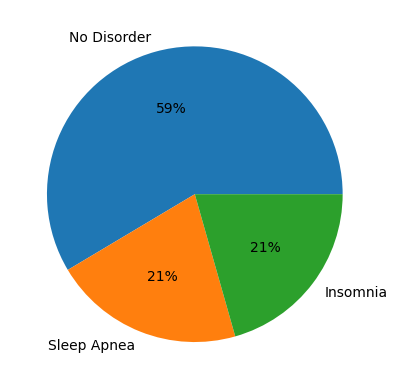

In [110]:
piedata = Slpd['Sleep Disorder Level'].value_counts()
plt.pie(piedata, labels = ['No Disorder', 'Sleep Apnea', 'Insomnia'], autopct = '%.0f%%' )
plt.show()

In [111]:
def feature_plotting(df, columns, plot = 'boxplot', label = None):
    plt.figure(figsize=(12, 6))
    
    for i, var in enumerate(columns):
        plt.subplot(3, 3, i + 1)
        
        if plot == 'boxplot':
            if not label:
                g = sns.boxplot(x=var, data=df, showfliers = True)
            else:
                g = sns.boxplot(y=var, data=df, showfliers=True, x=label)
        
        if plot == 'histplot':
            if not label:
                g = sns.histplot(x=var, data=df, kde=True)
            else:
                g = sns.histplot(x=var, data=df, kde=True, hue=label)
                
        if plot == 'scatter':
            if not label:
                g = sns.scatterplot(x=var, y = df.index, data=df)
            else:
                g = sns.scatterplot(x=var, y = df.index, data=df, hue = label)
                
    plt.tight_layout()                            

In [112]:
Slpd.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'GendInco',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Nurse', 'Occupation_Salesperson',
       'Occupation_Teacher', 'BMI Level', 'Sleep Disorder Level', 'Systole',
       'Diastole'],
      dtype='object')

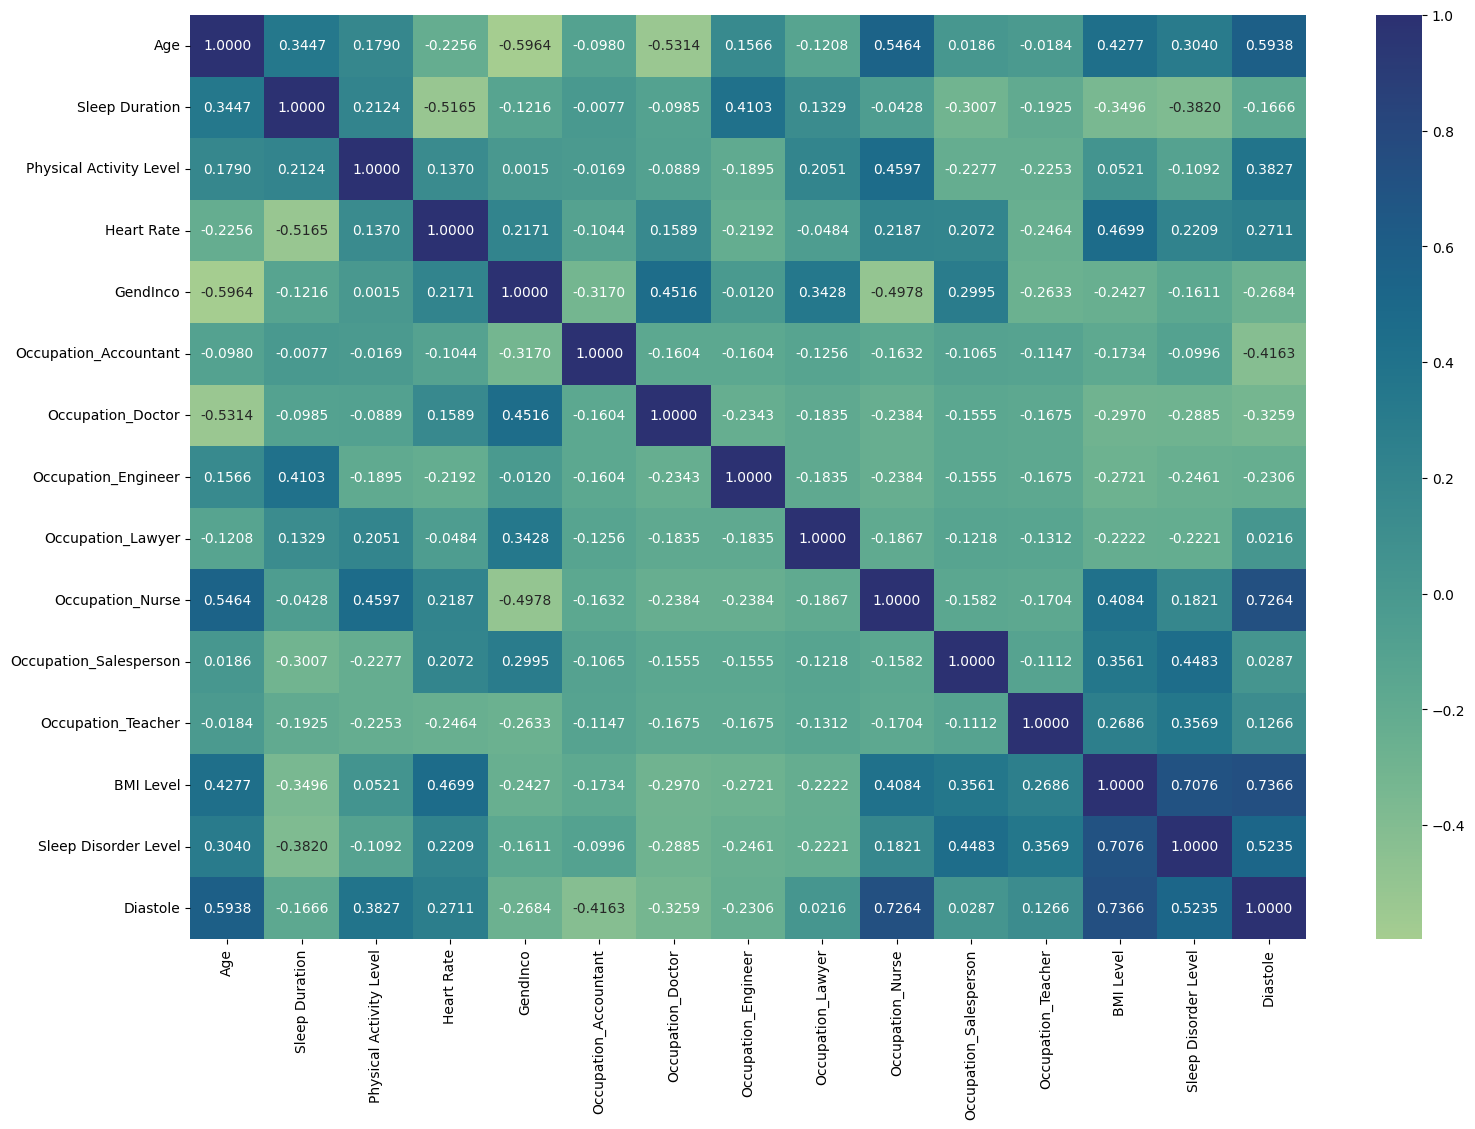

In [113]:
# From the correlation, can we remove the high correlated columns?
plt.figure(figsize=(18, 12))
sleepdata = Slpd.drop(['Quality of Sleep', 'Daily Steps', 'Stress Level', 'Systole'], axis=1)
sns.heatmap(sleepdata.corr(numeric_only=True), annot=True, fmt='.4f', cmap='crest')
plt.show()

In [114]:
sleepdata.columns

Index(['Age', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate',
       'GendInco', 'Occupation_Accountant', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Nurse',
       'Occupation_Salesperson', 'Occupation_Teacher', 'BMI Level',
       'Sleep Disorder Level', 'Diastole'],
      dtype='object')

In [115]:
numeric = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Diastole', 'Heart Rate']

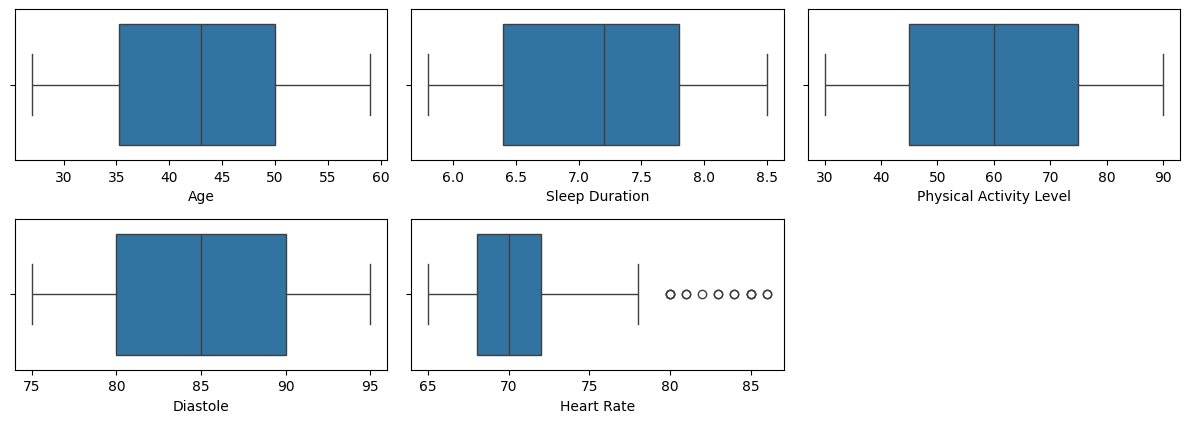

In [116]:
feature_plotting(sleepdata, numeric)

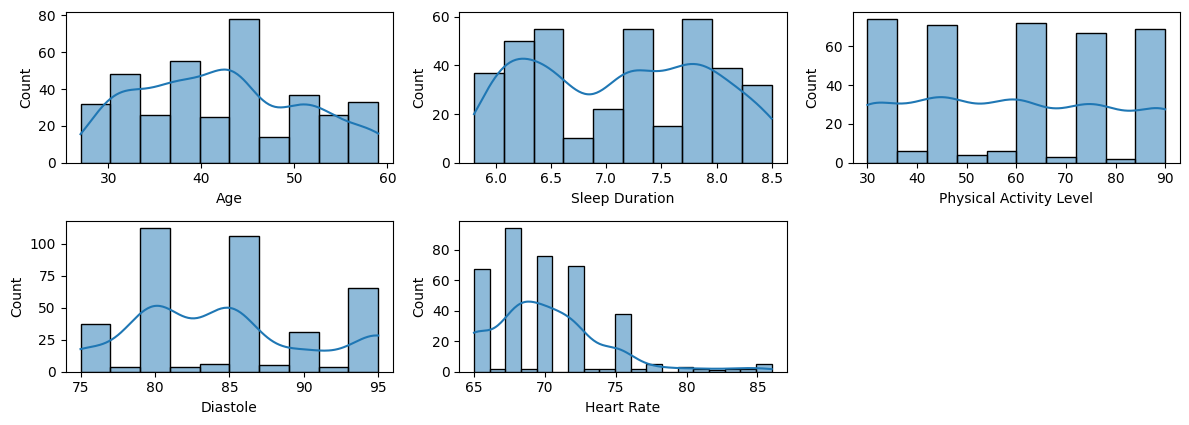

In [117]:
feature_plotting(sleepdata, numeric, plot = 'histplot')

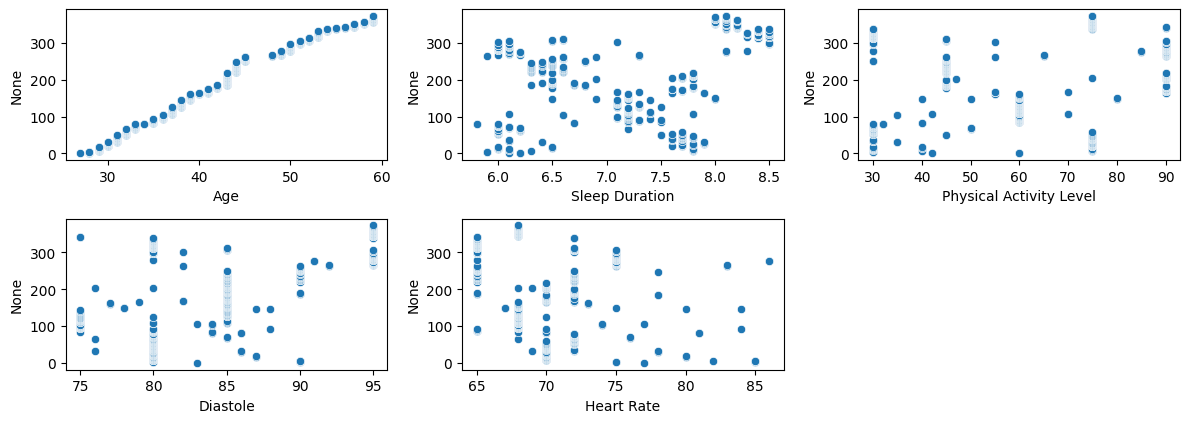

In [118]:
feature_plotting(sleepdata, numeric, plot = 'scatter')

<Axes: xlabel='Age Range', ylabel='Count'>

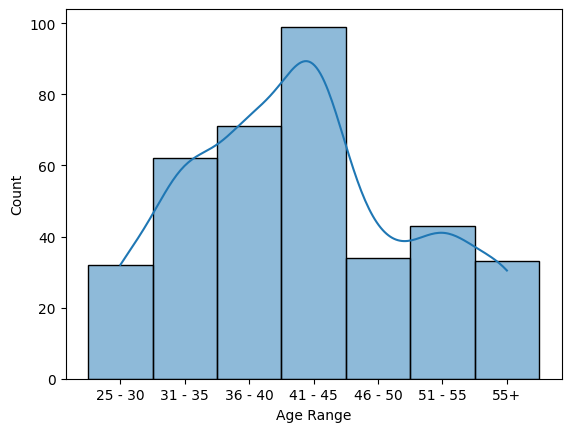

In [119]:
# Correctly categorize the Age into Age Ranges
sleepdata['Age Range'] = np.where(sleepdata['Age'] <= 30, '25 - 30',
                            np.where(sleepdata['Age'] <= 35, '31 - 35',
                                np.where(sleepdata['Age'] <= 40, '36 - 40',
                                    np.where(sleepdata['Age'] <= 45, '41 - 45',
                                        np.where(sleepdata['Age'] <= 50, '46 - 50',
                                            np.where(sleepdata['Age'] <= 55, '51 - 55', '55+'
                                                ))))))

# Plot using seaborn
sns.histplot(x='Age Range', data=sleepdata, kde=True)

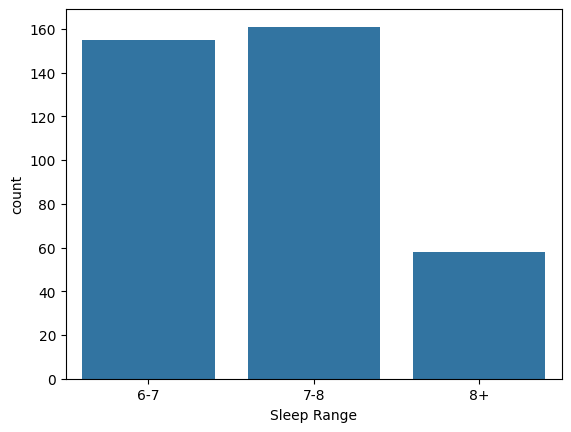

In [120]:
sleepdata['Sleep Range'] = np.where(sleepdata['Sleep Duration'] < 7, '6-7',
                                    np.where(sleepdata['Sleep Duration']<= 8, '7-8', '8+'))

sns.countplot(x = 'Sleep Range', data=sleepdata);

In [121]:
sleepdata['Diastole'].value_counts()

Diastole
80    111
85    102
95     65
75     34
90     31
82      4
84      4
86      4
76      3
87      3
83      2
88      2
78      2
92      2
77      2
91      2
79      1
Name: count, dtype: int64

In [122]:
sleepdata.head()

,Age,Sleep Duration,Physical Activity Level,Heart Rate,GendInco,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Level,Sleep Disorder Level,Diastole,Age Range,Sleep Range
0,27,6.1,42,77,1,0,0,1,0,0,0,0,1,0,83,25 - 30,6-7
1,28,6.2,60,75,1,0,1,0,0,0,0,0,0,0,80,25 - 30,6-7
2,28,6.2,60,75,1,0,1,0,0,0,0,0,0,0,80,25 - 30,6-7
3,28,5.9,30,85,1,0,0,0,0,0,1,0,2,1,90,25 - 30,6-7
4,28,5.9,30,85,1,0,0,0,0,0,1,0,2,1,90,25 - 30,6-7


In [123]:
LabelEncoder = LabelEncoder()
LabelEncoder.fit(sleepdata['Age Range'])

LabelEncoder()

In [124]:
sleepdata['Age indicator'] = LabelEncoder.transform(sleepdata['Age Range'])

In [125]:
sleepdata.head()

,Age,Sleep Duration,Physical Activity Level,Heart Rate,GendInco,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,BMI Level,Sleep Disorder Level,Diastole,Age Range,Sleep Range,Age indicator
0,27,6.1,42,77,1,0,0,1,0,0,0,0,1,0,83,25 - 30,6-7,0
1,28,6.2,60,75,1,0,1,0,0,0,0,0,0,0,80,25 - 30,6-7,0
2,28,6.2,60,75,1,0,1,0,0,0,0,0,0,0,80,25 - 30,6-7,0
3,28,5.9,30,85,1,0,0,0,0,0,1,0,2,1,90,25 - 30,6-7,0
4,28,5.9,30,85,1,0,0,0,0,0,1,0,2,1,90,25 - 30,6-7,0


In [126]:
y = sleepdata[['Sleep Disorder Level']]
X = sleepdata.drop(columns=['Age', 'Sleep Duration', 'Age Range', 'Sleep Range', 'Sleep Disorder Level'])

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [129]:
rf = RandomForestClassifier()
lr = LogisticRegression()
svc = SVC()

In [130]:
def calculate_scores(model, X, y, scoring = 'accuracy', cv = 5):
    scores = cross_val_score(model, X, y, scoring=scoring, cv=cv, error_score= 'raise')
    score = scores.mean()
    return score

In [131]:
# Calculate Accuracy
print('Accuracy for Random Forest: ', calculate_scores(rf, X_train, y_train.values.ravel()))
print('Accuracy for Logistic Regression: ', calculate_scores(lr, X_train, y_train.values.ravel()))
print('Accuracy for SVC: ', calculate_scores(svc, X_train, y_train.values.ravel()))

Accuracy for Random Forest:  0.8928571428571429
Accuracy for Logistic Regression:  0.875
Accuracy for SVC:  0.6678571428571429


In [132]:
print('F1_score for Random Forest: ', calculate_scores(rf, X_train, y_train.values.ravel(), scoring='f1_weighted'))
print('F1 score for Logistic Regression: ', calculate_scores(lr, X_train, y_train.values.ravel()))
print('F1 score for SVC: ', calculate_scores(svc, X_train, y_train.values.ravel(), scoring='f1_weighted'))

F1_score for Random Forest:  0.8887723756091402
F1 score for Logistic Regression:  0.875
F1 score for SVC:  0.574231647979053


In [133]:
#Choose Random Forest

param_grid = [
    {'n_estimators' : [100, 200, 300, 400], 'criterion' : ['gini', 'entropy']}
]

grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'n_estimators': [100, 200, 300, 400]}],
             return_train_score=True, scoring='accuracy')

In [134]:
grid.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [135]:
#Calculate prediction score
predictor = RandomForestClassifier(criterion='gini')
#predictor.fit(X_train, y_train.values.ravel())
y_val = cross_val_predict(predictor, X_train, y_train, cv=5)
f1 = f1_score(y_train, y_val, average='weighted')
display (f1)

np.float64(0.8926759264305257)

In [136]:
predictor.fit(X_train, y_train.values.ravel())
y_pred = predictor.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
display (f1)

np.float64(0.8921057075312395)